<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Проверка-формулы-вычисления-эффективности-обогащения" data-toc-modified-id="Проверка-формулы-вычисления-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка формулы вычисления эффективности обогащения</a></span></li><li><span><a href="#Признаки-недоступные-в-тестовой-выборке" data-toc-modified-id="Признаки-недоступные-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Признаки недоступные в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-изменения-концентрации-элементов-на-каждом-этапе" data-toc-modified-id="Исследование-изменения-концентрации-элементов-на-каждом-этапе-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование изменения концентрации элементов на каждом этапе</a></span></li><li><span><a href="#Рапсределение-размера-гранул" data-toc-modified-id="Рапсределение-размера-гранул-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Рапсределение размера гранул</a></span></li><li><span><a href="#Исследование-суммарных-концентраций" data-toc-modified-id="Исследование-суммарных-концентраций-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарных концентраций</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#sMAPE" data-toc-modified-id="sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>sMAPE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

**Описание проекта:** Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий. 

**Описание данных:** Данные находятся в трёх файлах:
- `gold_industry_train.csv` — обучающая выборка;
- `gold_industry_test.csv` — тестовая выборка;
- `gold_industry_full.csv` — исходные данные.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.

**Цель проекта:** Построить модель, которая должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

### Изучение данных

In [1]:
import pandas as pd
import warnings
import numpy as np
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer
import time

In [2]:
#display(HTML("<style>.container { width:85% !important; }</style>"))
#warnings.filterwarnings("ignore")
try:# конструкция try - except для надёжности
    data_test = pd.read_csv('gold_recovery_test_new.csv', index_col='date')
    data_train = pd.read_csv('gold_recovery_train_new.csv', index_col='date')
    data_full = pd.read_csv('gold_recovery_full_new.csv', index_col='date')
except:
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')

In [3]:
def inf(data):#функция для вывода информации о датасете
    display(data.head())
    data.info()
    display(data.describe(include='all').T)
    display(data.corr())
    print('Дубликатов:', data.duplicated().sum())
    return data

In [4]:
for i in [data_test, data_train, data_full]:
    inf(i)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

,count,mean,std,min,25%,50%,75%,max
primary_cleaner.input.sulfate,5286.0,174.839652,43.027080,2.566156e+00,147.121401,177.828489,208.125438,265.983123
primary_cleaner.input.depressant,5285.0,8.683596,3.072050,3.839482e-03,6.489555,8.052207,10.027764,40.000000
primary_cleaner.input.feed_size,5290.0,7.266339,0.610219,5.650000e+00,6.890000,7.250000,7.600000,15.500000
primary_cleaner.input.xanthate,5286.0,1.383803,0.643474,4.983673e-03,0.907623,1.197610,1.797819,4.102454
primary_cleaner.state.floatbank8_a_air,5290.0,1539.494325,116.797884,5.445860e-32,1498.935802,1585.129123,1602.076529,2103.103580
primary_cleaner.state.floatbank8_a_level,5290.0,-497.665883,19.952431,-7.953163e+02,-500.357298,-499.969164,-499.568951,-57.195404
primary_cleaner.state.floatbank8_b_air,5290.0,1545.174232,122.224588,6.647490e-32,1498.970993,1595.621798,1602.323545,1813.083671
primary_cleaner.state.floatbank8_b_level,5290.0,-500.273098,32.968307,-7.999970e+02,-500.703002,-500.028514,-499.293257,-142.527229
primary_cleaner.state.floatbank8_c_air,5290.0,1527.272362,122.538034,4.033736e-32,1473.229862,1549.594682,1601.143775,1715.053773
primary_cleaner.state.floatbank8_c_level,5290.0,-498.330680,21.964876,-7.999606e+02,-501.018117,-500.017711,-498.994130,-150.937035


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
primary_cleaner.input.sulfate,1.000000,0.455718,0.114456,0.497568,0.102653,0.048032,0.075737,0.138949,0.024710,0.027697,...,0.305793,0.117976,0.348395,0.068693,0.093608,0.132193,0.156583,0.072618,-0.134499,0.033945
primary_cleaner.input.depressant,0.455718,1.000000,0.215703,0.150760,0.144443,0.242592,0.148658,0.201499,0.036655,0.207632,...,0.326090,0.117510,0.238618,-0.085583,-0.090184,0.009138,0.064209,0.002988,-0.198422,0.034654
primary_cleaner.input.feed_size,0.114456,0.215703,1.000000,-0.291792,-0.064628,0.082869,-0.063490,0.071470,-0.091542,0.066384,...,-0.148328,-0.121148,-0.173658,-0.137180,-0.192880,-0.059167,-0.214970,-0.054173,0.026930,-0.083021
primary_cleaner.input.xanthate,0.497568,0.150760,-0.291792,1.000000,0.209017,-0.059553,0.153527,0.016144,0.044194,-0.078742,...,0.313377,0.131178,0.360961,0.121575,0.059162,0.128636,0.077380,0.095508,-0.218155,0.080662
primary_cleaner.state.floatbank8_a_air,0.102653,0.144443,-0.064628,0.209017,1.000000,0.121274,0.968679,-0.018713,0.814992,0.114058,...,0.469180,0.005962,0.476742,-0.058593,0.408050,0.271547,0.465492,0.161509,0.345231,0.172154
primary_cleaner.state.floatbank8_a_level,0.048032,0.242592,0.082869,-0.059553,0.121274,1.000000,0.101975,0.417515,-0.018378,0.784061,...,0.171716,0.096500,0.084418,-0.005819,-0.036132,0.164220,-0.012665,0.091263,-0.107710,0.076271
primary_cleaner.state.floatbank8_b_air,0.075737,0.148658,-0.063490,0.153527,0.968679,0.101975,1.000000,0.010220,0.862946,0.101127,...,0.483741,0.023801,0.487327,-0.080058,0.415343,0.260220,0.499829,0.155978,0.389594,0.187429
primary_cleaner.state.floatbank8_b_level,0.138949,0.201499,0.071470,0.016144,-0.018713,0.417515,0.010220,1.000000,-0.029228,0.406721,...,0.078411,0.216342,0.054902,-0.038440,-0.009671,0.029409,0.012115,0.004864,-0.006694,0.012904
primary_cleaner.state.floatbank8_c_air,0.024710,0.036655,-0.091542,0.044194,0.814992,-0.018378,0.862946,-0.029228,1.000000,0.003322,...,0.366373,0.047373,0.396029,-0.031081,0.400765,0.239333,0.500353,0.117465,0.490672,0.169634
primary_cleaner.state.floatbank8_c_level,0.027697,0.207632,0.066384,-0.078742,0.114058,0.784061,0.101127,0.406721,0.003322,1.000000,...,0.151945,0.093293,0.071559,-0.013814,-0.018878,0.143313,-0.004169,0.061153,-0.087866,0.067955


Дубликатов: 0


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,14148.0,5.142034,1.369586,0.000000,4.211620,4.994652,5.859540,16.001945
final.output.concentrate_pb,14148.0,10.132960,1.654930,0.000000,9.297355,10.297144,11.170603,17.031899
final.output.concentrate_sol,13938.0,9.202849,2.790516,0.000000,7.484645,8.845462,10.487508,18.124851
final.output.concentrate_au,14149.0,44.003792,4.905261,0.000000,43.276111,44.872436,46.166425,52.756638
final.output.recovery,14149.0,66.518832,10.295402,0.000000,62.545817,67.432775,72.346428,100.000000
...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,14148.0,-483.956022,37.892788,-797.142475,-500.363177,-499.702452,-487.712108,-275.073125
secondary_cleaner.state.floatbank5_b_air,14148.0,13.064590,5.765617,0.646208,8.994405,11.997547,17.982903,27.926001
secondary_cleaner.state.floatbank5_b_level,14148.0,-483.966564,39.207913,-800.006180,-500.105994,-499.914556,-453.186936,-157.396071
secondary_cleaner.state.floatbank6_a_air,14147.0,19.577539,5.764417,0.195324,14.989304,19.984175,24.991623,32.188906


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
final.output.concentrate_ag,1.000000,0.021110,0.351985,-0.104934,0.133238,0.289552,-0.099818,0.045896,0.193935,0.015923,...,0.041765,0.169538,0.020832,0.005319,0.013019,0.228753,0.021660,0.199048,0.170298,0.061009
final.output.concentrate_pb,0.021110,1.000000,-0.008451,0.320916,0.095000,-0.100616,0.240650,0.068287,0.029186,0.124170,...,-0.001365,-0.035219,0.092632,0.069315,0.095147,-0.096191,0.123765,-0.115190,-0.018740,0.075302
final.output.concentrate_sol,0.351985,-0.008451,1.000000,0.217363,0.249632,0.225460,0.259185,-0.023407,0.244294,0.343058,...,-0.007337,0.268279,0.032091,0.134591,0.031137,0.246817,0.015942,0.234651,0.228520,-0.276807
final.output.concentrate_au,-0.104934,0.320916,0.217363,1.000000,0.253067,0.079619,0.067949,0.098396,-0.070600,0.108014,...,0.035814,-0.042100,0.002307,-0.011165,0.005808,-0.098015,-0.014616,-0.086371,-0.123644,-0.030628
final.output.recovery,0.133238,0.095000,0.249632,0.253067,1.000000,0.151610,-0.151287,-0.088242,-0.435553,0.398307,...,0.207745,0.057454,0.170838,-0.088934,0.098267,0.024196,0.068331,0.043838,-0.027593,-0.035658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,0.228753,-0.096191,0.246817,-0.098015,0.024196,-0.008345,0.066600,-0.085835,0.116366,-0.031146,...,0.105263,0.790037,0.013033,0.554604,0.083423,1.000000,0.036557,0.884422,0.512286,0.379832
secondary_cleaner.state.floatbank5_b_air,0.021660,0.123765,0.015942,-0.014616,0.068331,0.008731,0.216899,-0.133159,-0.104743,-0.000789,...,0.723039,0.244762,0.878027,0.153923,0.892482,0.036557,1.000000,0.046352,0.474619,-0.025908
secondary_cleaner.state.floatbank5_b_level,0.199048,-0.115190,0.234651,-0.086371,0.043838,-0.000398,0.075721,-0.104591,0.101261,-0.022692,...,0.110727,0.747276,0.035808,0.515643,0.100697,0.884422,0.046352,1.000000,0.493110,0.342094
secondary_cleaner.state.floatbank6_a_air,0.170298,-0.018740,0.228520,-0.123644,-0.027593,-0.103898,0.072273,0.001968,0.068385,-0.106076,...,0.205628,0.566670,0.311765,0.271796,0.440929,0.512286,0.474619,0.493110,1.000000,0.098643


Дубликатов: 0


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,19438.0,5.168470,1.372348,0.000000,4.251240,5.066094,5.895527,16.001945
final.output.concentrate_pb,19438.0,9.978895,1.669240,0.000000,9.137262,10.102433,11.035769,17.031899
final.output.concentrate_sol,19228.0,9.501224,2.787537,0.000000,7.722820,9.218961,10.947813,19.615720
final.output.concentrate_au,19439.0,44.076513,5.129784,0.000000,43.402215,45.011244,46.275313,52.756638
final.output.recovery,19439.0,67.050208,10.125840,0.000000,63.299712,68.172738,72.686642,100.000000
...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,19438.0,-488.684065,34.533396,-797.323986,-500.458467,-499.802605,-498.384187,-244.483566
secondary_cleaner.state.floatbank5_b_air,19438.0,12.198224,5.333024,0.528083,8.971105,11.019433,14.019088,27.926001
secondary_cleaner.state.floatbank5_b_level,19438.0,-487.149827,38.347312,-800.220337,-500.129462,-499.935317,-499.436708,-137.740004
secondary_cleaner.state.floatbank6_a_air,19437.0,18.959024,5.550498,-0.079426,14.983037,19.960541,24.003170,32.188906


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
final.output.concentrate_ag,1.000000,0.063570,0.380142,-0.038373,0.185952,0.334596,-0.051855,0.028890,0.206569,0.071158,...,0.027343,0.104118,0.029887,-0.063246,-0.004246,0.184332,0.003693,0.156471,0.162591,0.059581
final.output.concentrate_pb,0.063570,1.000000,-0.048586,0.374400,0.151987,-0.126886,0.221372,0.094385,-0.047446,0.079160,...,0.058380,0.028962,0.115404,0.093859,0.125920,-0.024668,0.149266,-0.060038,-0.042372,0.067458
final.output.concentrate_sol,0.380142,-0.048586,1.000000,0.261225,0.265993,0.286305,0.221714,-0.023865,0.267781,0.316233,...,-0.049341,0.147304,0.020544,0.002077,-0.002361,0.163992,-0.009510,0.152343,0.245158,-0.216734
final.output.concentrate_au,-0.038373,0.374400,0.261225,1.000000,0.288568,0.080381,0.081291,0.134978,-0.031696,0.102781,...,0.008308,-0.019481,-0.015284,-0.018636,-0.000971,-0.080786,-0.016961,-0.084962,-0.082184,-0.019523
final.output.recovery,0.185952,0.151987,0.265993,0.288568,1.000000,0.125986,-0.143094,-0.050280,-0.409200,0.366954,...,0.167059,0.031317,0.158557,-0.049973,0.067014,0.011871,0.052017,0.016480,-0.025192,-0.005305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,0.184332,-0.024668,0.163992,-0.080786,0.011871,-0.021662,0.015060,-0.073670,0.035272,-0.098079,...,0.175689,0.737533,0.069865,0.417890,0.154722,1.000000,0.108107,0.818406,0.464142,0.344494
secondary_cleaner.state.floatbank5_b_air,0.003693,0.149266,-0.009510,-0.016961,0.052017,-0.013677,0.132744,-0.135330,-0.160522,-0.088879,...,0.734503,0.289059,0.855785,0.099747,0.895832,0.108107,1.000000,0.090751,0.491707,-0.011976
secondary_cleaner.state.floatbank5_b_level,0.156471,-0.060038,0.152343,-0.084962,0.016480,-0.003762,0.041558,-0.087635,0.063404,-0.054203,...,0.147999,0.630466,0.076251,0.364582,0.135991,0.818406,0.090751,1.000000,0.411510,0.327861
secondary_cleaner.state.floatbank6_a_air,0.162591,-0.042372,0.245158,-0.082184,-0.025192,-0.055311,0.007496,-0.070706,0.038797,-0.175804,...,0.229330,0.503967,0.311676,0.087389,0.473300,0.464142,0.491707,0.411510,1.000000,0.106270


Дубликатов: 0


**Вывод:** Столбцов очень много, везде нужный тип данных, дубликатов нету и в каждом файле есть немного пропусков.

### Проверка формулы вычисления эффективности обогащения

In [5]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

data_train['rougher.output.recovery.calculate'] = C * (F - T) / (F * (C - T)) * 100
#формула из теории
mae = (data_train['rougher.output.recovery.calculate'] - data_train['rougher.output.recovery']).abs().sum() / len(data_train)
               
print('MAE равен:', mae)

MAE равен: 9.73512347450521e-15


**Вывод:** MAE близок к нулю, значит формула верна.

### Признаки недоступные в тестовой выборке

In [6]:
[i for i in list(data_train) if i not in list(data_test)]

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

**Вывод:** В тестовой выборке нет столбцов в названии, которых есть output или calculation, из-за того что скорее всего эти признаки заполняются значительно после остальных признаков.

### Предобработка данных

In [7]:
data_train = data_train.fillna(method='bfill')
data_test = data_test.fillna(method='bfill')
data_full = data_full.fillna(method='bfill')
print(data_train.isna().sum())
print(data_test.isna().sum())#заполняю пропуски ближайшими значениями так как в описании проекта написано, 
print(data_full.isna().sum())#что соседние данные зачастую похожи

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
rougher.output.recovery.calculate             0
Length: 87, dtype: int64
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner

In [8]:
data_test_upd = data_test.join(data_full.loc[data_test.index][['final.output.recovery','rougher.output.recovery']])
#добавил таргет в test

**Вывод:** На данном этапе изучил датасеты, проверил правильность расчёта MAE, заполнил пропуски и проверил все датасеты на наличие дубликатов. Можно приступать к следующему этапу.

## Анализ данных

### Исследование изменения концентрации элементов на каждом этапе

In [9]:
print('Концентрация до флотации:')
print('Ag:', data_full['rougher.input.feed_ag'].mean(), 
      'Au:', data_full['rougher.input.feed_au'].mean(), 
      'Pb:', data_full['rougher.input.feed_pb'].mean())

print('Концентрация после флотации:')
print('Ag:', data_full['rougher.output.concentrate_ag'].mean(), 
      'Au:', data_full['rougher.output.concentrate_au'].mean(), 
      'Pb:', data_full['rougher.output.concentrate_pb'].mean())

print('Концентрация после первичной очистки:')
print('Ag:', data_full['primary_cleaner.output.concentrate_ag'].mean(), 
      'Au:', data_full['primary_cleaner.output.concentrate_au'].mean(), 
      'Pb:', data_full['primary_cleaner.output.concentrate_pb'].mean())

print('Концентрация после вторичной очистки:')
print('Ag:', data_full['final.output.concentrate_ag'].mean(), 
      'Au:', data_full['final.output.concentrate_au'].mean(), 
      'Pb:', data_full['final.output.concentrate_pb'].mean())

Концентрация до флотации:
Ag: 8.794927425814699 Au: 8.266097326589135 Pb: 3.5858502002943964
Концентрация после флотации:
Ag: 11.994759359873452 Au: 19.772000139486334 Pb: 7.606272313194984
Концентрация после первичной очистки:
Ag: 8.442408077719056 Au: 32.1194004078766 Pb: 9.810429599798816
Концентрация после вторичной очистки:
Ag: 5.168382318064333 Au: 44.076512941952664 Pb: 9.978816662494985


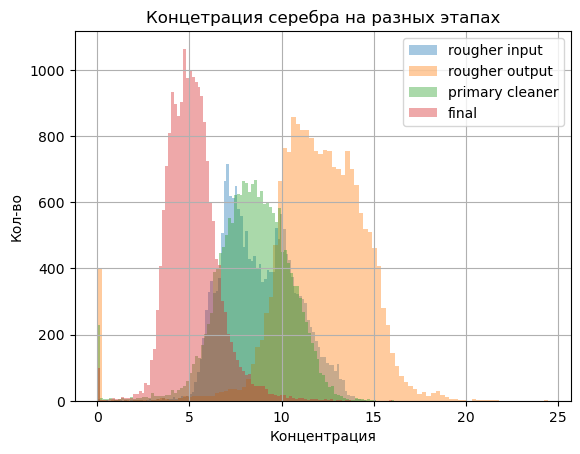

In [10]:
a = ['rougher input', 'rougher output', 'primary cleaner', 'final']
z = [data_full['rougher.input.feed_ag'], 
     data_full['rougher.output.concentrate_ag'], 
     data_full['primary_cleaner.output.concentrate_ag'],
    data_full['final.output.concentrate_ag']]
for i in range(0, 4):
    z[i].hist(bins=100, alpha=0.4)
plt.title('Концетрация серебра на разных этапах')
plt.xlabel('Концентрация')
plt.ylabel('Кол-во')
plt.legend(a)
plt.show()

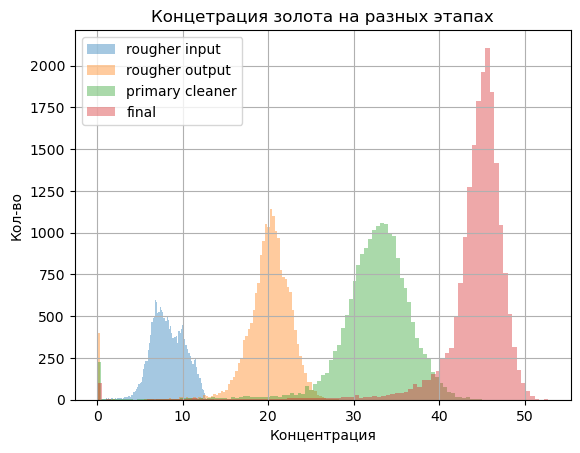

In [11]:
a = ['rougher input', 'rougher output', 'primary cleaner', 'final']
z = [data_full['rougher.input.feed_au'], 
     data_full['rougher.output.concentrate_au'], 
     data_full['primary_cleaner.output.concentrate_au'],
    data_full['final.output.concentrate_au']]
for i in range(0, 4):
    z[i].hist(bins=100, alpha=0.4)
plt.title('Концетрация золота на разных этапах')
plt.xlabel('Концентрация')
plt.ylabel('Кол-во')
plt.legend(a)
plt.show()

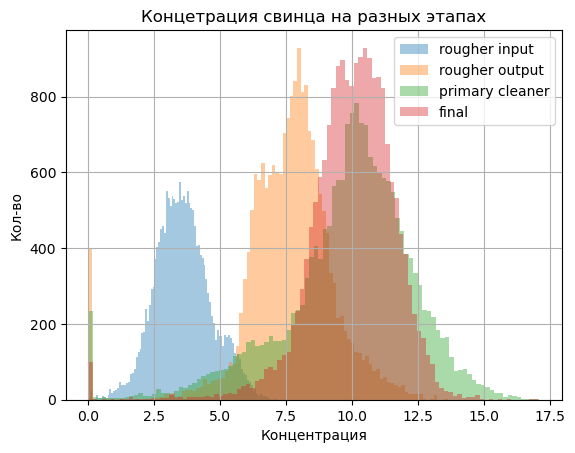

In [12]:
a = ['rougher input', 'rougher output', 'primary cleaner', 'final']
z = [data_full['rougher.input.feed_pb'], 
     data_full['rougher.output.concentrate_pb'], 
     data_full['primary_cleaner.output.concentrate_pb'],
    data_full['final.output.concentrate_pb']]
for i in range(0, 4):
    z[i].hist(bins=100, alpha=0.4)
plt.title('Концетрация свинца на разных этапах')
plt.xlabel('Концентрация')
plt.ylabel('Кол-во')
plt.legend(a)
plt.show()

**Вывод:** Концентрация серебра после флотации поднимается, а после этого сразу же падает. Концентрация золота после каждой операции сильно растёт, что логично так как компании нужно именно золото. Концентрация свинца также растёт после каждой операции, но очень слабо растёт.

### Рапсределение размера гранул

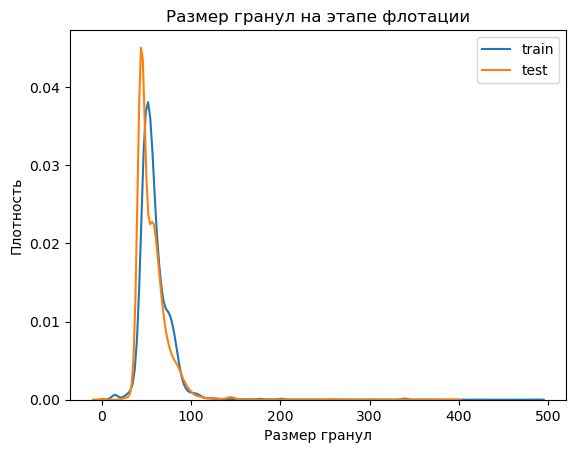

In [13]:
a = ['train', 'test']
sns.kdeplot(data_train['rougher.input.feed_size'])
sns.kdeplot(data_test['rougher.input.feed_size'])
plt.legend(a)
plt.ylabel('Плотность')
plt.xlabel('Размер гранул')
plt.title('Размер гранул на этапе флотации')
plt.show()

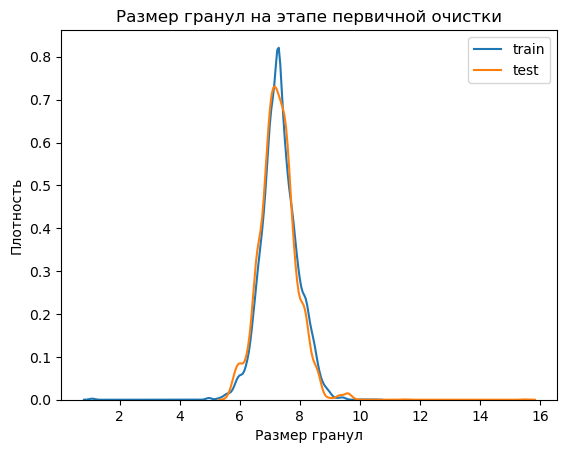

In [14]:
sns.kdeplot(data_train['primary_cleaner.input.feed_size'])
sns.kdeplot(data_test['primary_cleaner.input.feed_size'])
plt.legend(a)
plt.ylabel('Плотность')
plt.xlabel('Размер гранул')
plt.title('Размер гранул на этапе первичной очистки')
plt.show()

Распределение данных слегка отличается на обоих этапах, но не критично.

### Исследование суммарных концентраций

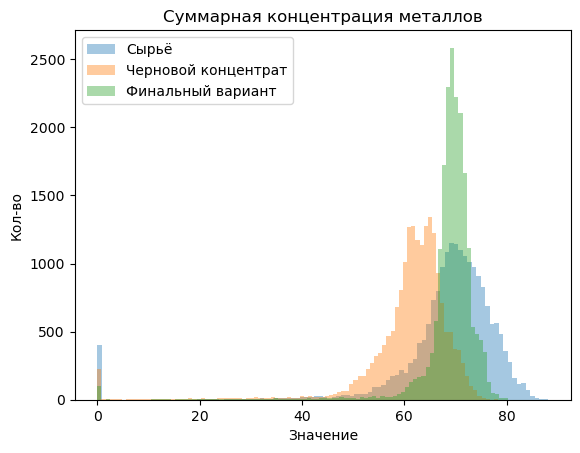

In [15]:
x = ['Сырьё', 'Черновой концентрат', 'Финальный вариант']
r = (data_full['rougher.output.concentrate_ag'] 
+ data_full['rougher.output.concentrate_pb'] 
+ data_full['rougher.output.concentrate_au'] 
+ data_full['rougher.output.concentrate_sol'])
plt.hist(r, bins=100, alpha=0.4)
r = (data_full['primary_cleaner.output.concentrate_ag'] 
+ data_full['primary_cleaner.output.concentrate_pb'] 
+ data_full['primary_cleaner.output.concentrate_au'] 
+ data_full['primary_cleaner.output.concentrate_sol'])
plt.hist(r, bins=100, alpha=0.4)
r = (data_full['final.output.concentrate_ag'] 
+ data_full['final.output.concentrate_pb'] 
+ data_full['final.output.concentrate_au'] 
+ data_full['final.output.concentrate_sol'])
plt.hist(r, bins=100, alpha=0.4)
plt.xlabel('Значение')
plt.ylabel('Кол-во')
plt.title('Суммарная концентрация металлов')
plt.legend(x)
plt.show()

Виден пик около нуля это скорее всего выбросы. Их следует удалить.

В сырье суммарная концентрация металлов в основном в районе 70, в черновом варианте концентрация падает и образует два пика, один на 65, другой на 60, и в финальном варианте концентрация снова на уровне 70.

In [16]:
data_full = data_full.drop(index=data_full[data_full["rougher.output.concentrate_au"] < 1].index,
                               axis=0)#так как я не нашёл другого способа, я удаляю строки так
data_full = data_full.drop(index=data_full[data_full["rougher.output.concentrate_ag"] < 1].index,
                               axis=0)#в train делаю точно также
data_full = data_full.drop(index=data_full[data_full["rougher.output.concentrate_pb"] < 1].index,
                               axis=0)
data_full = data_full.drop(index=data_full[data_full["rougher.output.concentrate_sol"] < 1].index,
                               axis=0)
#в test я этого не делаю так как там нету этих столбцов
data_full = data_full.drop(index=data_full[data_full["primary_cleaner.output.concentrate_au"] < 1].index,
                               axis=0)
data_full = data_full.drop(index=data_full[data_full["primary_cleaner.output.concentrate_ag"] < 1].index,
                               axis=0)
data_full = data_full.drop(index=data_full[data_full["primary_cleaner.output.concentrate_pb"] < 1].index,
                               axis=0)
data_full = data_full.drop(index=data_full[data_full["primary_cleaner.output.concentrate_sol"] < 1].index,
                               axis=0)

data_full = data_full.drop(index = data_full[data_full["final.output.concentrate_au"] < 1].index,
                               axis=0)
data_full = data_full.drop(index = data_full[data_full["final.output.concentrate_ag"] < 1].index,
                               axis=0)
data_full = data_full.drop(index = data_full[data_full["final.output.concentrate_pb"] < 1].index,
                               axis=0)
data_full = data_full.drop(index = data_full[data_full["final.output.concentrate_sol"] < 1].index,
                               axis=0)

In [17]:
data_train = data_train.drop(index=data_train[data_train["rougher.output.concentrate_au"] < 1].index,
                               axis=0)
data_train = data_train.drop(index=data_train[data_train["rougher.output.concentrate_ag"] < 1].index,
                               axis=0)
data_train = data_train.drop(index=data_train[data_train["rougher.output.concentrate_pb"] < 1].index,
                               axis=0)
data_train = data_train.drop(index=data_train[data_train["rougher.output.concentrate_sol"] < 1].index,
                               axis=0)

data_train = data_train.drop(index=data_train[data_train["primary_cleaner.output.concentrate_au"] < 1].index,
                               axis=0)
data_train = data_train.drop(index=data_train[data_train["primary_cleaner.output.concentrate_ag"] < 1].index,
                               axis=0)
data_train = data_train.drop(index=data_train[data_train["primary_cleaner.output.concentrate_pb"] < 1].index,
                               axis=0)
data_train = data_train.drop(index=data_train[data_train["primary_cleaner.output.concentrate_sol"] < 1].index,
                               axis=0)

data_train = data_train.drop(index = data_train[data_train["final.output.concentrate_au"] < 1].index,
                               axis=0)
data_train = data_train.drop(index = data_train[data_train["final.output.concentrate_ag"] < 1].index,
                               axis=0)
data_train = data_train.drop(index = data_train[data_train["final.output.concentrate_pb"] < 1].index,
                               axis=0)
data_train = data_train.drop(index = data_train[data_train["final.output.concentrate_sol"] < 1].index,
                               axis=0)

**Вывод:** На данном этапе я исследовал концентрацию металлов на каждом этапе, также исследовал распределение размера гранул в тренировочной и тестовой выборках и пришёл к выводу, что распределение слегка отличается, исследовал суммарную концентрацию металлов на каждом этапе и удалил выбросы.

## Модель

### sMAPE

In [18]:
def sMAPE(target, predict):#функция для расчёта smape
    smape = np.mean(abs(target - predict)/((abs(target)+abs(predict))/2))*100
    return smape

In [19]:
def sMAPE_final(sMAPE_rougher,sMAPE_final):
    sMAPE_f = 0.25 * sMAPE_rougher + 0.75 * sMAPE_final
    return sMAPE_f#функция для расчёта финального sMAPE

### Обучение моделей

In [20]:
rougher_cols = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 
                'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
                'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate',
                'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
                'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
                'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
                'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
                'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
                'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level']
final_cols = ['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 
              'primary_cleaner.input.xanthate', 'primary_cleaner.state.floatbank8_a_air',
              'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air',
              'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air',
              'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air',
              'primary_cleaner.state.floatbank8_d_level', 'secondary_cleaner.state.floatbank2_a_air',
              'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank2_b_air',
              'secondary_cleaner.state.floatbank2_b_level', 'secondary_cleaner.state.floatbank3_a_air',
              'secondary_cleaner.state.floatbank3_a_level', 'secondary_cleaner.state.floatbank3_b_air',
              'secondary_cleaner.state.floatbank3_b_level', 'secondary_cleaner.state.floatbank4_a_air',
              'secondary_cleaner.state.floatbank4_a_level', 'secondary_cleaner.state.floatbank4_b_air',
              'secondary_cleaner.state.floatbank4_b_level', 'secondary_cleaner.state.floatbank5_a_air',
              'secondary_cleaner.state.floatbank5_a_level', 'secondary_cleaner.state.floatbank5_b_air',
              'secondary_cleaner.state.floatbank5_b_level', 'secondary_cleaner.state.floatbank6_a_air',
              'secondary_cleaner.state.floatbank6_a_level']
features_train_rougher = data_train[rougher_cols].copy() 
features_train_clean = data_train[final_cols].copy()
features_test_rougher = data_test[rougher_cols].copy()
features_test_clean = data_test[final_cols].copy()
target_train = data_train[['final.output.recovery','rougher.output.recovery']]
target_test = data_test_upd[['final.output.recovery','rougher.output.recovery']]


numeric_rougher = features_train_rougher.columns
scaler_rougher = StandardScaler()
scaler_rougher.fit(features_train_rougher[numeric_rougher])
features_train_rougher = scaler_rougher.transform(features_train_rougher[numeric_rougher])
features_test_rougher = scaler_rougher.transform(features_test_rougher[numeric_rougher])
numeric_final = features_train_clean.columns
scaler_final = StandardScaler()#два скелера так как разное количество признаков в rougher и clean
scaler_final.fit(features_train_clean[numeric_final])
features_train_clean = scaler_final.transform(features_train_clean[numeric_final])
features_test_clean = scaler_final.transform(features_test_clean[numeric_final])

In [21]:
%%time 
#для измерения времени выполнения кода здесь и в последующих ячейках
smape_scorer = make_scorer(sMAPE, greater_is_better=False)
model_r = LinearRegression()#обучение регрессии при помощи кросс валидации
smape_scores_rougher = cross_val_score(model_r, features_train_rougher, target_train['rougher.output.recovery'], 
                               cv=5, 
                               scoring=smape_scorer)
smape_rougher = np.mean(abs(smape_scores_rougher))
print('sMAPE rougher:', smape_rougher)

sMAPE rougher: 6.388237073583386
Wall time: 38 ms


In [22]:
%%time

smape_scores_final = cross_val_score(model_r, features_train_clean, target_train['final.output.recovery'], 
                               cv=5, 
                               scoring=smape_scorer)
smape_final = np.mean(abs(smape_scores_final))
print('sMAPE final:', sMAPE_final(smape_rougher, smape_final))

sMAPE final: 8.80311828890496
Wall time: 60 ms


In [23]:
%%time

model_rf_rougher = RandomForestRegressor(random_state=12)
parameters = {'max_depth': [i for i in range(1, 15, 2)],
              'n_estimators': [i for i in range(1, 100, 20)],
              'min_samples_split': [i for i in range(2, 11, 2)],
              'min_samples_leaf': [i for i in range(1, 10, 2)]
             }
#обучение моделей при помощи GridSearchCV
grid_rf_rougher = GridSearchCV(model_rf_rougher,
                              parameters,
                              cv=5,
                              scoring=smape_scorer,
                              n_jobs=-1
                              )
grid_rf_rougher.fit(features_train_rougher, target_train['rougher.output.recovery'])

print('Лучшие параметры:', grid_rf_rougher.best_params_)
print('sMAPE rougher:', np.mean(abs(grid_rf_rougher.best_score_)))

Лучшие параметры: {'max_depth': 11, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 21}
sMAPE rougher: 6.455843678994418
Wall time: 22min 16s


In [24]:
%%time

model_rf_final = RandomForestRegressor(random_state=13)
parameters = {'max_depth': [i for i in range(1, 15, 2)],
              'n_estimators': [i for i in range(1, 100, 20)],
              'min_samples_split': [i for i in range(2, 11, 2)],
              'min_samples_leaf': [i for i in range(1, 10, 2)]
             }

grid_rf_final = GridSearchCV(model_rf_final,
                              parameters,
                              cv=5,
                              scoring=smape_scorer,
                              n_jobs=-1
                                 )
grid_rf_final.fit(features_train_clean, target_train['final.output.recovery'])

print('Лучшие параметры:', grid_rf_final.best_params_)
print('sMAPE final:', sMAPE_final(np.mean(abs(grid_rf_rougher.best_score_)), np.mean(abs(grid_rf_final.best_score_))))

Лучшие параметры: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 41}
sMAPE final: 8.931021435121716
Wall time: 30min 40s


In [25]:
%%time

model_tr_rougher = DecisionTreeRegressor(random_state=123)
parameters = {'max_depth': [i for i in range(1, 15, 2)], 
             'criterion' : ['squared_error', 'friedman_mse', 'absolute_error']
             }

grid_tr_rougher = GridSearchCV(model_tr_rougher,
                               parameters,
                               cv=5,
                                scoring=smape_scorer,
                              n_jobs=-1
                              )
grid_tr_rougher.fit(features_train_rougher, target_train['rougher.output.recovery'])
print('Лучшие параметры:', grid_tr_rougher.best_params_)
print('sMAPE rougher:', np.mean(abs(grid_tr_rougher.best_score_)))

Лучшие параметры: {'criterion': 'absolute_error', 'max_depth': 3}
sMAPE rougher: 6.916198065313173
Wall time: 56.9 s


In [26]:
%%time

model_tr_final = DecisionTreeRegressor(random_state=124)
parameters = {'max_depth': [i for i in range(1, 15, 2)], 
             'criterion' : ['squared_error', 'friedman_mse', 'absolute_error']
             }

grid_tr_final = GridSearchCV(model_tr_final,
                              parameters,
                              cv=5,
                              scoring=smape_scorer,
                              n_jobs=-1
                              )
grid_tr_final.fit(features_train_clean, target_train['final.output.recovery'])
print('Лучшие параметры:', grid_tr_final.best_params_)
print('sMAPE final:', sMAPE_final(np.mean(abs(grid_tr_rougher.best_score_)), np.mean(abs(grid_tr_final.best_score_))))

Лучшие параметры: {'criterion': 'squared_error', 'max_depth': 1}
sMAPE final: 9.130034594093246
Wall time: 58.1 s


Насколко здесь правильный код? Просто я уже пару дней сижу над этим и не понимаю как здесь надо.

**Вывод:** После обучения моделей при помощи кросс валидации лучший результат показала линейная регрессия, а значит её и будем использовать для предсказаний на тестовой выборке.

### Проверка модели на тестовой выборке

In [29]:
model_rougher = LinearRegression()
model_rougher.fit(features_train_rougher, target_train['rougher.output.recovery'])
rougher_test = model_rougher.predict(features_test_rougher)
smape_test_rougher = sMAPE(target_test['rougher.output.recovery'].values, rougher_test)
model_clean = LinearRegression()
model_clean.fit(features_train_clean, target_train['final.output.recovery'])
clean_test = model_clean.predict(features_test_clean)
smape_test_clean = sMAPE(target_test['final.output.recovery'].values, clean_test)
print('sMAPE final:', sMAPE_final(smape_test_rougher, smape_test_clean))

sMAPE final: 9.33939359076125


In [28]:
model_k = DummyRegressor()
model_k.fit(features_train_rougher, target_train['rougher.output.recovery'])
pred_k = model_k.predict(features_test_rougher)
smape_roug_k = sMAPE(target_test['rougher.output.recovery'].values, pred_k)
model_kt = DummyRegressor()#дамми модель для сравнения с лучшей моделью и понимания нужны ли такие заморочки
model_kt.fit(features_train_clean, target_train['final.output.recovery'])
pred_kt = model_kt.predict(features_test_clean)
smape_final_k = sMAPE(target_test['final.output.recovery'].values, pred_kt)
print('sMAPE final:', sMAPE_final(smape_roug_k, smape_final_k))

sMAPE final: 9.779989884685566


**Итоговый вывод:** В данном проекте я заполнил пропуски, удалил выбросы, исследовал концентрацию металлов на каждом этапе, также исследовал распределение размера гранул в тренировочной и тестовой выборках, изучил суммарную концентрацию металлов на каждом этапе, также я обучил несколько моделей и выбрал из них лучшую при помощи кросс валидации, этой моделью оказалась линейная регрессия, и именно её я проверил на тестовой выборке и сравнил с константной моделью. В ходе этого сравнения я получил итоговый sMAPE у регрессии равный 9,3, а у константной модели - 9,8, это означает, что регрессия прошла проверку на адекватность и предсказывает результат лучше, чем константная модель.